In [1]:
import os
from pathlib import Path
from pretty_midi import PrettyMIDI
import numpy as np
from rich.progress import track

In [2]:
# filesystem setup
input_path = os.path.join("..", "inputs", "all")
output_path = "../data"
output_filename = "all_data_prs.npz"

if not os.path.exists(output_path):
    os.mkdir(output_path)

# data setup
fs = 100

prs = {}
for file in track(os.listdir(input_path)):
    if file.endswith(".mid") or file.endswith(".midi"):
        filename = Path(file).stem
        file_path = os.path.join(input_path, file)
        midi = PrettyMIDI(file_path)
        roll = midi.get_piano_roll(fs=fs)
        prs[filename] = roll

np.savez_compressed(os.path.join(output_path, output_filename), **prs)

Output()

In [15]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")


def draw_piano_roll(piano_roll, title, fs=100):
    plt.figure(figsize=(12, 8))
    plt.imshow(
        piano_roll, aspect="auto", origin="lower", cmap="magma", interpolation="nearest"
    )
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("MIDI Note Number")
    plt.colorbar()

    tick_spacing = 1
    ticks = np.arange(0, 401 / fs, tick_spacing)
    plt.xticks(ticks * fs, labels=[f"{tick:.1f}" for tick in ticks])

    plt.show()

In [7]:
all_prs = np.load(os.path.join(output_path, output_filename))
name, pr = list(all_prs.items())[0]

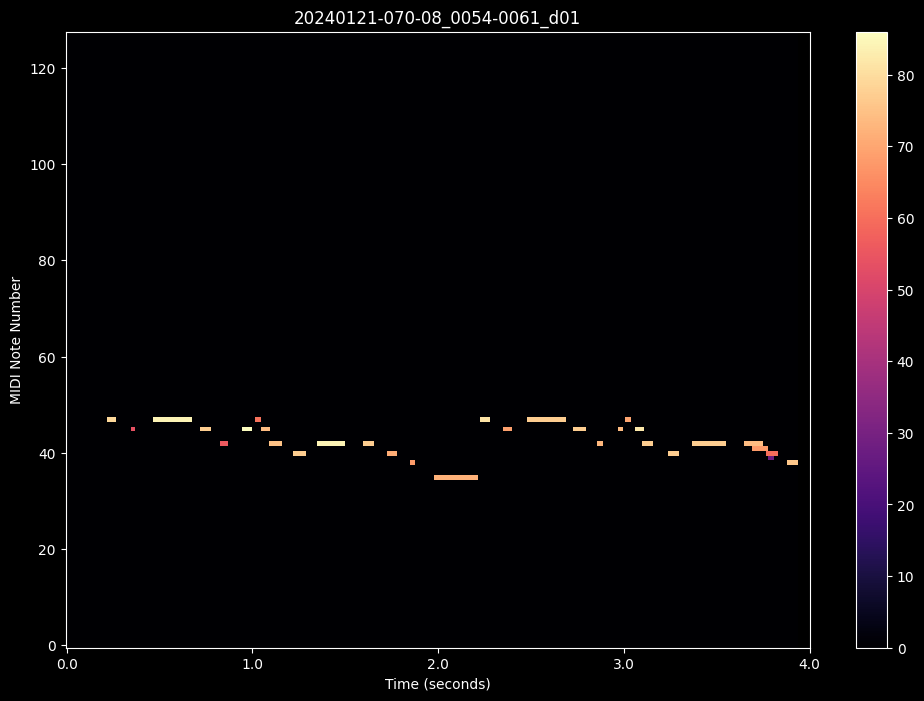

In [16]:
draw_piano_roll(pr, name)